\begin{center}
Gabe Morris
\end{center}

In [1]:
# Notebook Preamble
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from IPython.display import display, Markdown

plt.style.use('maroon_ipynb.mplstyle')

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 4403 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 6-1
## Given
A 10-mm steel drill rod was heat treated and ground. The measured hardness was found to be 300 Brinell.

## Find
Estimate the endurance strength in $MPa$ if the rod is used in rotating bending.

## Solution
Eq. 6-10 on p. 305, 

$$S^\prime_e=\begin{cases}
0.5S_{ut} & S_{ut} \le 200\ ksi\ (1400\ MPa)\\
100 & S_{ut} > 200\ ksi \\
700\ MPa & S_{ut} > 1400\ MPa
\end{cases}$$

The ultimate strength of steel comes from Eq. 2-36,

$$S_{ut}=3.4H_B$$

In [2]:
H_B = 300
S_ut = sp.S('3.4')*H_B

if S_ut <= 1400:
    S_e_prime = 0.5*S_ut
else:
    S_e_prime = sp.S(700)

S_e_prime  # ksi

510.000000000000

This value is not the final value. The relationship for the refined value is,

$$S_e=k_ak_bk_ck_dk_eS^\prime_e$$

The only necessary $k$ values used for this analysis is $k_a$ and $k_b$, whose equations are at 6-18 and 6-19 respectfully.

In [3]:
# See Table 6-2
k_a = sp.S('1.38')*S_ut**-(sp.S('0.067'))
d = 10
k_b = sp.S('1.24')*d**-(sp.S('0.107'))
# display(k_a, k_b)
S_e = k_a*k_b*S_e_prime
S_e  # MPa

428.839455736079

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 6-3
## Given
A steel rotating beam test specimen has an ultimate strength of $120\ ksi$.

## Find
Estimate the life of the specimen if it is tested at completely reversed stress amplitude of $70\ ksi$.

## Solution
Find $S_e$ first.

In [4]:
S_ut = sp.S(120)  # ksi

if S_ut <= 200:
    S_e_prime = 0.5*S_ut
else:
    S_e_prime = sp.S(100)

S_e_prime  # ksi

60.0000000000000

The $S^\prime_e$ value will be used in place of $S_e$ from Figure 6-23 description. We can use the following relationships to determine $N$.

$$N=\left(\frac{\sigma_{ar}}{a}\right)^{1/b}$$
$$a=\frac{(fS_{ut})^2}{S_e}$$
$$b=-\frac{1}{3}\log\left(\frac{fS_{ut}}{Se}\right)$$

The value of $f$ is 0.82 from Figure 6-23. The $S_{ut}$ value is $2(S_e)=120\ ksi$.

In [5]:
def log10(x_):
    return sp.log(x_)/sp.log(10)

f = sp.S('0.82')
a = (f*S_ut)**2/S_e_prime
b = -sp.Rational(1, 3)*log10(f*S_ut/S_e_prime)

display(sp.Eq(sp.Symbol('a'), a.n()),
        sp.Eq(sp.Symbol('b'), b.n()))

sig_ar = 70
N = ((sig_ar/a)**(1/b)).n()
N  # cycles

Eq(a, 161.376)

Eq(b, -0.0716146160158993)

116192.956004683

\pagebreak

\begin{center}
\begin{tabular}{ccc}
ME 4403 & Homework 4 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 6-17
## Given

\begin{center}
\includegraphics{images/fig1}
\end{center}

The shaft shown in the figure above is machined from AISI 1040 CD steel. The shaft rotates at 1600 rpm and is supported in roller bearings at $A$ and $B$. The applied forces are $F_1=2500\ lbf$ and $F_2=1000\ lbf$.

## Find
Determine the minimum fatigue factor of safety based on achieving infinite life. If infinite life is not predicted, estimate the number of cycles to failure. Also check for yielding.

## Solution
The reaction forces need to be solved first.

In [6]:
A, B = sp.symbols('A B')
F1, F2 = 2500, 1000

eq1 = sp.Eq(A + B, F1 + F2)
eq2 = sp.Eq(B*24 - F1*8 - F2*16, 0)

sol = sp.solve([eq1, eq2], dict=True)[0]

display(eq1, eq2, Markdown('---'))
for key, value in sol.items():
    display(sp.Eq(key, value))

Eq(A + B, 3500)

Eq(24*B - 36000, 0)

---

Eq(A, 2000)

Eq(B, 1500)

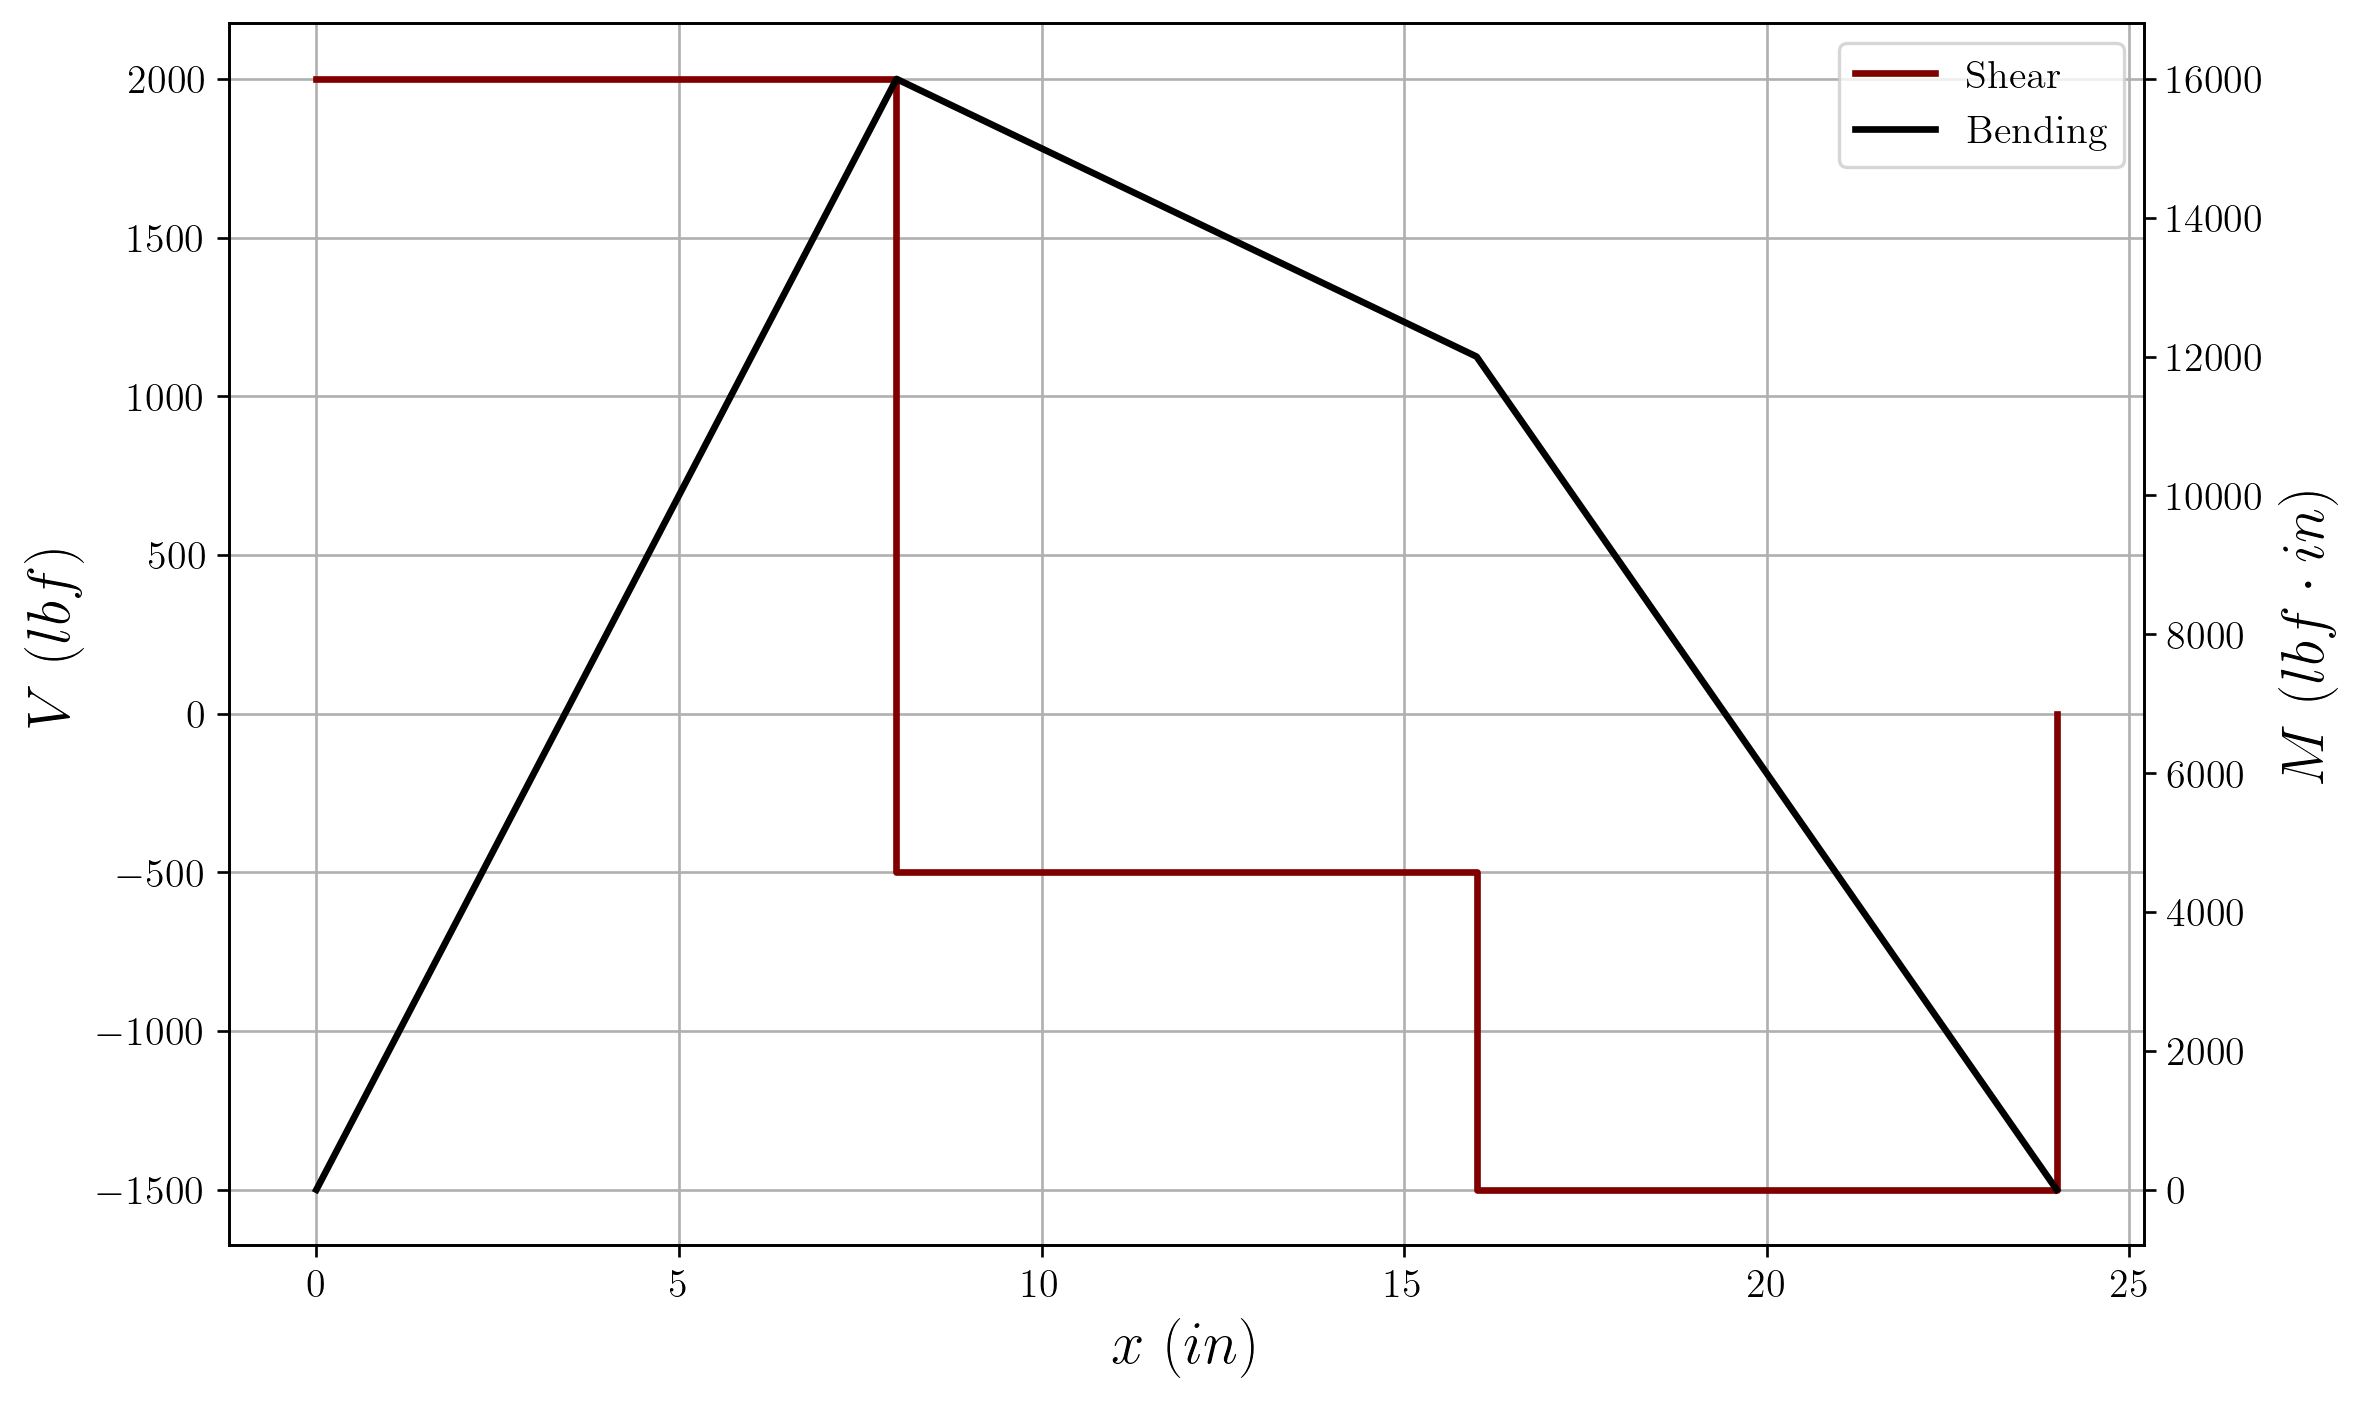

In [7]:
# Plotting Shear and Bending Moment Diagram
x = [0, 8, 16, 24]
x_shear = [0, 8, 8, 16, 16, 24, 24]
V1, V2, V3, V4 = [sol[A], sol[A] - F1, sol[A] - F1 - F2, sol[A] - F1 - F2 + sol[B]]
V = [V1, V1, V2, V2, V3, V3, V4]
M = M1, M2, M3, M4 = [0, V1*8, V1*8 + V2*8, V1*8 + V2*8 + V3*8]

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(x_shear, V, label='Shear')
ax2.plot(x, M, color='black', label='Bending')
ax2.grid(visible=False)

ax.legend(handles=[ax.lines[0], ax2.lines[0]])
ax.set_xlabel('$x$ ($in$)')
ax.set_ylabel('$V$ ($lbf$)')
ax2.set_ylabel(r'$M$ ($lbf\cdot in$)')

plt.show()

We are interested in the stress at the fillet radius in which the smaller diameter is used.

In [8]:
M_mid = (M3 - M2)/8*(sp.S('10.5') - 8) + M2
M_mid  # in lbf*in

14750.0000000000

In [9]:
c = sp.S('1.625')/2
I = sp.pi.n()/4*c**4
sig = M_mid*c/I
sig  # in psi

35013.2181769320

The yield strength is $71\ ksi$, and this stress is far below this value. The ultimate strength is $S_{ut}=0.5(H_B)=0.5(170)=85\ ksi$. To determine whether infinite life can be reached,

$$n_f=\frac{S_e}{K_f\sigma}$$

This is a variation of Eq. 6-42, but we are multiplying by the fatigue concentration factor to obtain the maximum stress value from the fillet geometry. From Eq. 6-32,

$$K_f=1+\frac{K_t-1}{1+\sqrt{a/r}}$$

A maybe calculated using Eq. 6-35. $K_t$ comes from Figure A-15-9.

In [10]:
r = sp.S('0.0625')
K_t = sp.S('1.95')
S_ut = sp.S(85)
a = (sp.S('0.246') - sp.S('3.08e-3')*S_ut + sp.S('1.51e-5')*S_ut**2 - sp.S('2.67e-8')*S_ut**3)**2
Kf = 1 + (K_t - 1)/(1 + sp.sqrt(a/r))
Kf

1.72652106649163

$S_e$ maybe calculated using the same procedure as before.

In [11]:
if S_ut <= 200:
    S_e_prime = 0.5*S_ut
else:
    S_e_prime = sp.S(100)

S_e_prime  # ksi

42.5000000000000

In [12]:
a_factor, b_exponent = 2, sp.S('-0.217')  # Table 6-2
k_a = a_factor*S_ut**b_exponent
d = sp.S('1.625')
k_b = sp.S('0.879')*d**sp.S('-0.107')
S_e = k_a*k_b*S_e_prime
S_e  # ksi

27.0497081578753

In [13]:
# Getting nf
S_e/(Kf*sig/1000)

0.447464588712579

Because the factor of safety is less than one, infinite fatigue cannot be reached. There must be some finite number of cycles, $N$.

In [14]:
f = sp.S('0.867')

a = (f*S_ut)**2/S_e
b = -sp.Rational(1, 3)*log10(f*S_ut/S_e)

display(sp.Eq(sp.Symbol('a'), a.n()),
        sp.Eq(sp.Symbol('b'), b.n()))

N = ((sig/1000*Kf/a)**(1/b)).n()
N  # cycles

Eq(a, 200.776769690168)

Eq(b, -0.145091813123711)

3917.08718671478

**Important:** The answer in the back of the book uses rounded values. For instance,

In [15]:
Kf = sp.S('1.72')
a, b = sp.S('200.78'), sp.S('-0.145')
sig = 35
(sig*Kf/a)**(1/b)

4052.76515886349

This relationship is very sensitive.